Implement Random Forest Classifier model to predict the safety of the car. Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')
Accuracy: 0.9624277456647399
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346

Confusion Matrix:
 [[ 72   1   3   1]
 [  2  10   0   3]
 [  1   0 236   0]
 [  2   0   0  15]]
feature_scores :  safety      0.280329
persons     0.22855

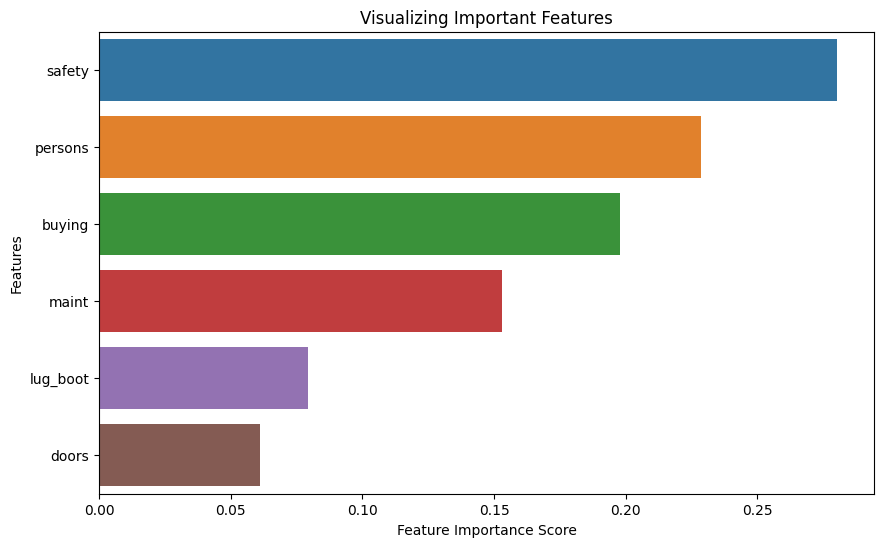

In [ ]:
# Step 1: Import required libraries 
import pandas as pd  # For data handling and manipulation
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For better visualizations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder  # For encoding categorical features
from sklearn.ensemble import RandomForestClassifier  # For the Random Forest Classifier model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance

# Explanation:
# - `pandas` helps in loading and manipulating the dataset.
# - `matplotlib.pyplot` is used for plotting graphs.
# - `seaborn` is used to create better-looking visualizations.
# - `train_test_split` is used to split data into training and testing subsets.
# - `LabelEncoder` converts categorical values into numerical format.
# - `RandomForestClassifier` is the machine learning model used for classification.
# - `accuracy_score`, `classification_report`, and `confusion_matrix` are used for evaluating model accuracy and effectiveness.

# Step 2: Load the dataset
data = pd.read_csv("car_evaluation.csv")  # Load dataset (ensure file is in the working directory)
print(data.head())  # Display the first few rows to understand data structure

# Step 3: Assign column names
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']  # Assign column names as per the dataset
print(data.columns)  # Verify the columns

# Step 4: Preprocess the data
# Encoding categorical features to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    # it is encoding each column in data
    data[column] = label_encoder.fit_transform(data[column])

# Explanation:
# - We loop through each column to encode categorical data into numeric form.
# - `LabelEncoder` converts each unique category in a column to a unique integer.

# Step 5: Split the data into features and labels
X = data.drop('class', axis=1)  # Features (independent variables)
y = data['class']  # Label (dependent variable to be predicted

# Explanation:
# - We separate `class` as the target variable `y`, while `X` contains all features.
# - `drop('class', axis=1)` removes the target column from `X`.

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation:
# - `train_test_split` splits data into training (70%) and testing (30%) subsets.
# - `test_size=0.3` specifies 30% of data is held for testing, 70% for training.
# - `random_state=42` ensures reproducibility by fixing the random split.

# Step 7: Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Explanation:
# - `RandomForestClassifier`: Ensemble model using multiple decision trees for classification.
# - `n_estimators=100`: Specifies the number of trees in the forest.
# - `fit(X_train, y_train)`: Trains the model using the training data.

# Step 8: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Explanation:
# - `predict(X_test)`: Uses the trained model to make predictions on the test set.

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print("Accuracy:", accuracy)  # Print the accuracy score

# Displaying additional evaluation metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Explanation:
# - `accuracy_score` gives the accuracy of the model on test data.
# - `classification_report` provides precision, recall, and F1-score for each class.
# - `confusion_matrix` shows the number of correct and incorrect predictions per class.

# Step 10: Visualize feature importances
feature_scores = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
# rf_classifier.feature_importances_: This attribute stores the importance score for each feature
# pd.Series(..., index=X.columns): We create a pandas Series with:
# rf_classifier.feature_importances_ as the data
# X.columns (which are the feature names, ['A', 'B', 'C']) as the index

# .sort_values(ascending=False): Finally, we sort this Series in descending order to see the most important features at the top.
print("feature_scores : ",feature_scores)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Explanation:
# - `feature_importances_` provides the importance of each feature in the Random Forest model.
# - We use `pd.Series` to create a pandas Series and sort the features by importance.
# - `seaborn.barplot` is used to plot the feature importances in a bar chart.
# - The chart shows which features contribute the most to the model's decisions.


In [2]:
# Explanation of Each Step and What Happens
# Library Importing: This includes essential libraries for data processing, modeling, and evaluation.

# Loading the Dataset: We load the Car Evaluation dataset, displaying its first few rows to understand its structure, including feature and target variable names.

# Data Preprocessing: The Car Evaluation dataset contains categorical data (e.g., ‘buying’, ‘maint’, ‘doors’). We encode these to numerical values using LabelEncoder to make it compatible with the Random Forest model.

# Feature-Target Split: We separate the dataset into features (X) and target variable (y). The class column serves as the target to be predicted.

# Data Split: We split X and y into training and testing subsets. Training data will train the model, and test data will assess its predictive accuracy.

# Random Forest Model Training: We initialize RandomForestClassifier with 100 decision trees (n_estimators=100) and train it on the training set.

# Prediction: Using the trained model, we predict the class labels for the test data (y_test).

# Evaluation: We evaluate model performance using accuracy, a classification report, and a confusion matrix. The accuracy score shows the percentage of correct predictions, while the classification report provides insights into the model's precision and recall. The confusion matrix shows counts of true positives, false positives, true negatives, and false negatives for each class.